In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
bottle = pd.read_csv('/home/anurag/ML/calcofi/bottle.csv')
print(bottle.head())


/home/anurag/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat         ...           \
0       0   10.50  33.440     NaN  25.649    NaN         ...            
1       8   10.46  33.440     NaN  25.656    NaN         ...            
2      10   10.46  33.437     NaN  25.654    NaN         ...            
3      19   10.45  33.420     NaN  25.643    NaN         ...            
4      20   10.45  33.421     NaN  25.643    NaN         ...            

   R_PHAEO  R_PRES  R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  \
0      NaN       0     NaN   NaN   NaN  Na

In [6]:
#bottle['T_degC']

In [7]:
# Setting up our datasets
bottle = pd.read_csv('/home/anurag/ML/calcofi/bottle.csv')
bottle = bottle[['Salnty', 'T_degC']]
bottle.columns = ['Sal', 'Temp']

# Limiting amount of entries to speed up regression time
bottle = bottle[:][:500]

print(bottle.head())

/home/anurag/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      Sal   Temp
0  33.440  10.50
1  33.440  10.46
2  33.437  10.46
3  33.420  10.45
4  33.421  10.45


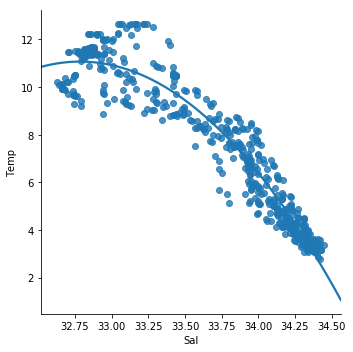

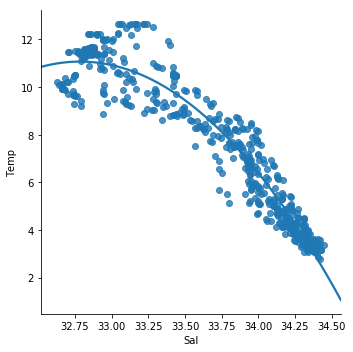

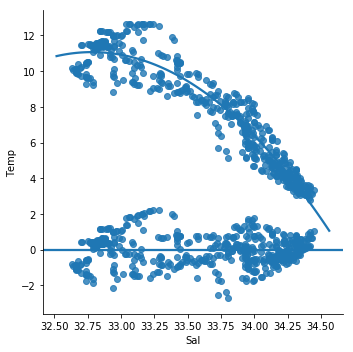

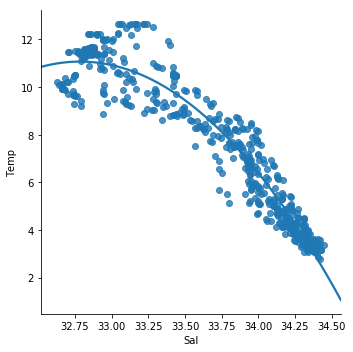

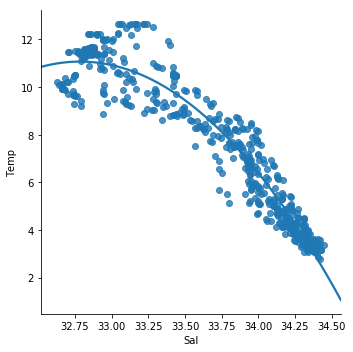

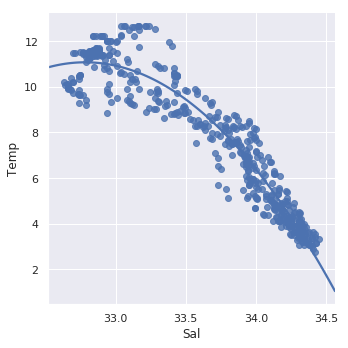

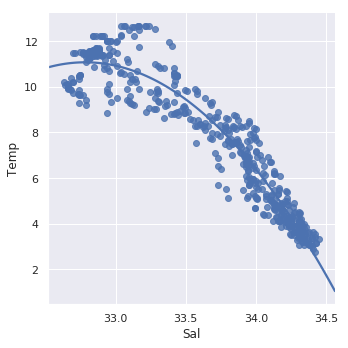

In [15]:
# This produces a scatter 
sns.set()
s = sns.lmplot(x="Sal", y="Temp", data=bottle,order=2, ci=None);
plt.show()

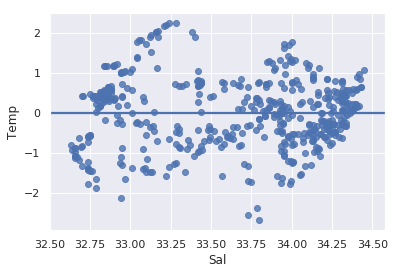

In [16]:
# Picturing a residual plot to check for heteroscedasticity 
sns.residplot(bottle['Sal'], bottle['Temp'], order=2, lowess=True)
plt.show()

In [22]:
bottle.isnull().values.any()

True

In [23]:
# Eliminating NaN or missing input numbers
bottle.fillna(method='ffill', inplace=True)

In [24]:
bottle.isnull().values.any()

False

In [25]:
# Set up the training data
X = np.array(bottle['Sal']).reshape(-1, 1)
y = np.array(bottle['Temp']).reshape(-1, 1)

bottle.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8454496710125274


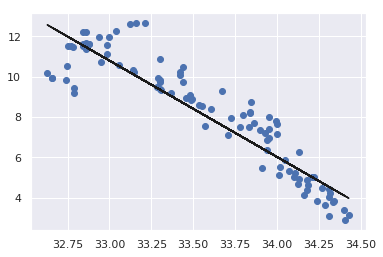

In [27]:
# Make predictions using the new model
y_pred = clf.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()

In [32]:
clf.score(X, y)

0.8485704710838669